Full Formula (Sr1 Cl2)
Reduced Formula: SrCl2
abc   :   4.983141   4.983141   4.983141
angles:  60.000000  60.000000  60.000000
Sites (3)
  #  SP       a     b     c    magmom
---  ----  ----  ----  ----  --------
  0  Sr    0     0     0           -0
  1  Cl    0.75  0.75  0.75         0
  2  Cl    0.25  0.25  0.25         0
The first three pics are placed in the following tabular: 2 théea, intensity, hkl 
21.826502291188778 74.55057201345961 [{'hkl': (1, 1, 1), 'multiplicity': 2}, {'hkl': (1, 0, 0), 'multiplicity': 6}]
25.254908163762394 0.8622048244287865 [{'hkl': (1, 1, 0), 'multiplicity': 6}]
36.017522061924694 100.0 [{'hkl': (2, 1, 1), 'multiplicity': 6}, {'hkl': (1, 0, -1), 'multiplicity': 6}]




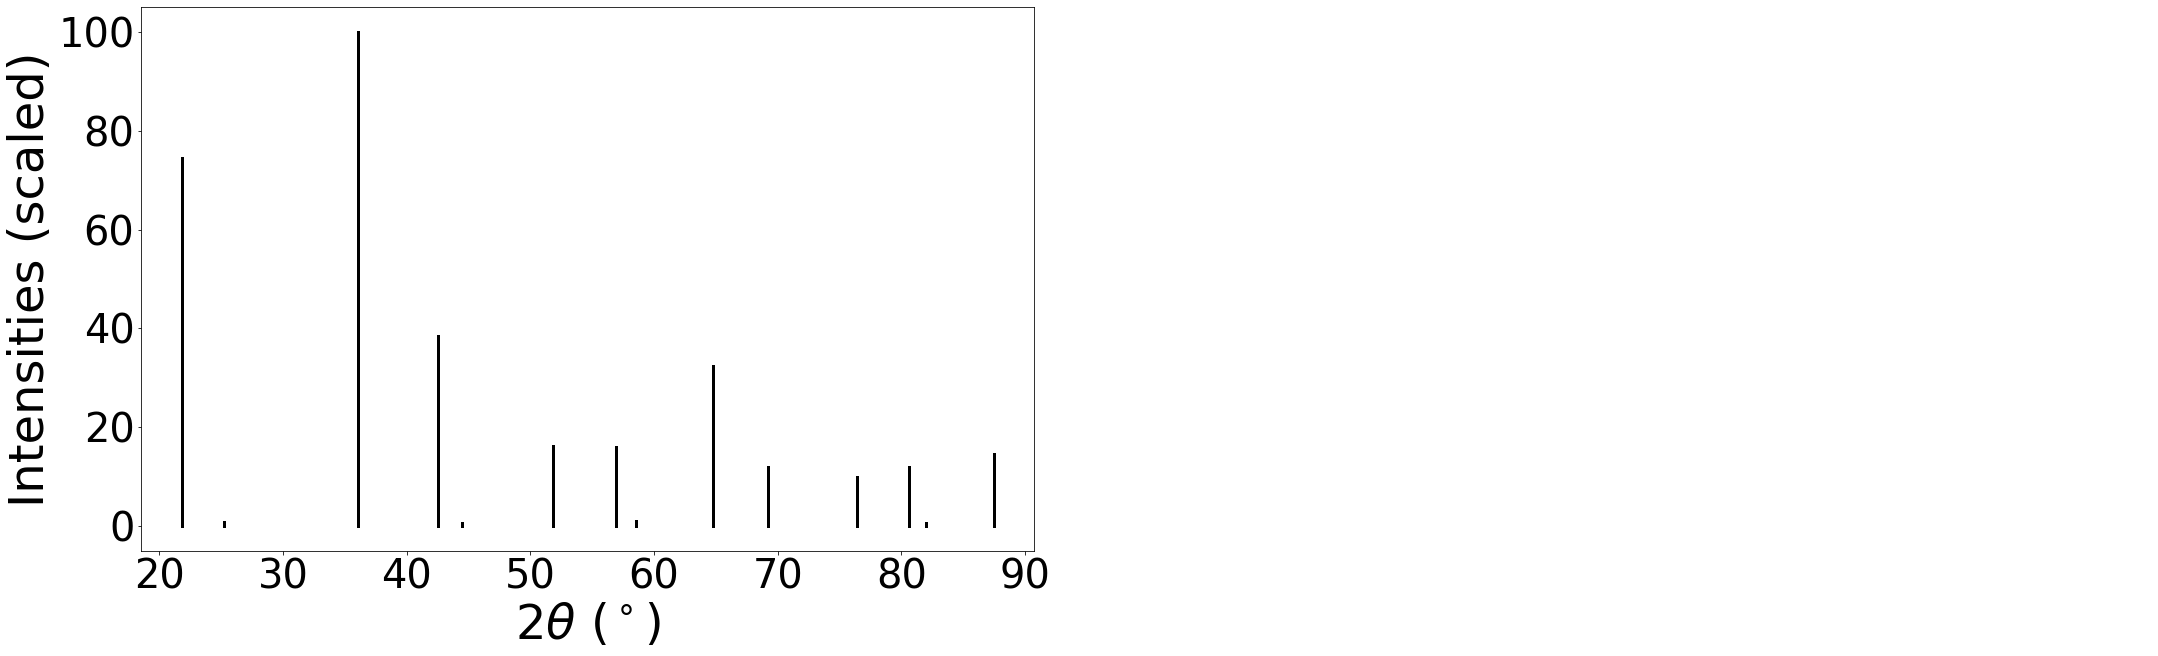

In [3]:
import pymatgen as mp
import numpy as np
import pymatgen.symmetry.analyzer as span
import pymatgen.core.lattice as lat
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.spectrum import Spectrum
from pymatgen.analysis.diffraction.core import AbstractDiffractionPatternCalculator

with MPRester("tA2HQFkWnG7wRPHf") as api:
    st=api.get_structure_by_material_id("mp-23209")
print(st)


finder = span.SpacegroupAnalyzer(st)
new_finder=finder.get_primitive_standard_structure()
diffp=XRDCalculator(1.54060,0,None)
xrd=diffp.get_pattern(new_finder,True,None)
print("The first three pics are placed in the following tabular: 2 theta, intensity, hkl ")
print(xrd.x[0],xrd.y[0],xrd.hkls[0])
print(xrd.x[1],xrd.y[1],xrd.hkls[1])
print(xrd.x[2],xrd.y[2],xrd.hkls[2])
print("\n")
print("")
two_theta_range=(0,90)
from pymatgen.util.plotting import pretty_plot
plt = pretty_plot(16, 10)
ax = plt.gca()
for two_theta, i, hkls, d_hkl in zip(xrd.x, xrd.y, xrd.hkls, xrd.d_hkls):
    if two_theta_range[0] <= two_theta <= two_theta_range[1]:
        label = ", ".join([str(hkl["hkl"]) for hkl in hkls])
        ax.plot([two_theta, two_theta], [0, i], color='k',linewidth=3, label=label)
ax.annotate(label, xy=[two_theta, i],xytext=[two_theta, i], fontsize=16)
ax.set_xlabel(r"$2\theta$ ($^\circ$)")
ax.set_ylabel("Intensities (scaled)")
plt.show()